# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | baicheng
Processing Record 3 of Set 1 | ahau
City not found. Skipping...
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | el granada
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | mersa matruh
Processing Record 18 of Set 1 | naze
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | al ghayzah
Processing Record 21 of Set 1 | anadyr
Processin

Processing Record 41 of Set 4 | mandalgovi
Processing Record 42 of Set 4 | pangody
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | puerto ayora
Processing Record 45 of Set 4 | magadan
Processing Record 46 of Set 4 | tura
Processing Record 47 of Set 4 | robore
Processing Record 48 of Set 4 | broken hill
Processing Record 49 of Set 4 | manokwari
Processing Record 0 of Set 5 | port douglas
Processing Record 1 of Set 5 | concordia
Processing Record 2 of Set 5 | chicxulub puerto
City not found. Skipping...
Processing Record 3 of Set 5 | jacksonville
Processing Record 4 of Set 5 | kakonko
Processing Record 5 of Set 5 | ingeniero jacobacci
Processing Record 6 of Set 5 | garrett
Processing Record 7 of Set 5 | bridlington
Processing Record 8 of Set 5 | gorontalo
Processing Record 9 of Set 5 | hammerfest
Processing Record 10 of Set 5 | williams lake
Processing Record 11 of Set 5 | portland
Processing Record 12 of Set 5 | fale old settlement
Processing Record 13 of S

Processing Record 28 of Set 8 | pariaman
Processing Record 29 of Set 8 | dingwall
Processing Record 30 of Set 8 | arraial do cabo
Processing Record 31 of Set 8 | mahdia
Processing Record 32 of Set 8 | palembang
Processing Record 33 of Set 8 | kone
Processing Record 34 of Set 8 | tobelo
Processing Record 35 of Set 8 | yarmouth
Processing Record 36 of Set 8 | callao
Processing Record 37 of Set 8 | tolanaro
Processing Record 38 of Set 8 | mildura
Processing Record 39 of Set 8 | muang phonsavan
Processing Record 40 of Set 8 | boca suno
Processing Record 41 of Set 8 | murzuq
Processing Record 42 of Set 8 | wewak
Processing Record 43 of Set 8 | huasahuasi
Processing Record 44 of Set 8 | arkhangel'sk
Processing Record 45 of Set 8 | pavlodar
Processing Record 46 of Set 8 | gharyan
Processing Record 47 of Set 8 | la'ie
Processing Record 48 of Set 8 | cidreira
Processing Record 49 of Set 8 | nar'yan-mar
Processing Record 0 of Set 9 | bandarbeyla
Processing Record 1 of Set 9 | south hedland
Proce

Processing Record 16 of Set 12 | kulia village
City not found. Skipping...
Processing Record 17 of Set 12 | narbonne
Processing Record 18 of Set 12 | qalat
Processing Record 19 of Set 12 | queenstown
Processing Record 20 of Set 12 | juneau
Processing Record 21 of Set 12 | kolonia
Processing Record 22 of Set 12 | souillac
Processing Record 23 of Set 12 | walvis bay
Processing Record 24 of Set 12 | kafin hausa
Processing Record 25 of Set 12 | tezu
Processing Record 26 of Set 12 | maracas
Processing Record 27 of Set 12 | cooper's town
Processing Record 28 of Set 12 | korla
Processing Record 29 of Set 12 | ixtapa
Processing Record 30 of Set 12 | sao jose da coroa grande
Processing Record 31 of Set 12 | kristiansund
Processing Record 32 of Set 12 | mahenge
Processing Record 33 of Set 12 | aljezur
Processing Record 34 of Set 12 | poronaysk
Processing Record 35 of Set 12 | beidao
Processing Record 36 of Set 12 | inari
Processing Record 37 of Set 12 | portrush
Processing Record 38 of Set 12 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,4.25,79,91,3.44,CL,1726462349
1,baicheng,45.6167,122.8167,24.87,39,34,9.37,CN,1726462350
2,longyearbyen,78.2186,15.6401,3.91,93,75,3.09,SJ,1726462352
3,ribeira grande,38.5167,-28.7000,21.54,93,87,3.58,PT,1726462353
4,blackmans bay,-43.0167,147.3167,13.62,54,63,1.79,AU,1726462354


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.25,79,91,3.44,CL,1726462349
1,baicheng,45.6167,122.8167,24.87,39,34,9.37,CN,1726462350
2,longyearbyen,78.2186,15.6401,3.91,93,75,3.09,SJ,1726462352
3,ribeira grande,38.5167,-28.7000,21.54,93,87,3.58,PT,1726462353
4,blackmans bay,-43.0167,147.3167,13.62,54,63,1.79,AU,1726462354


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

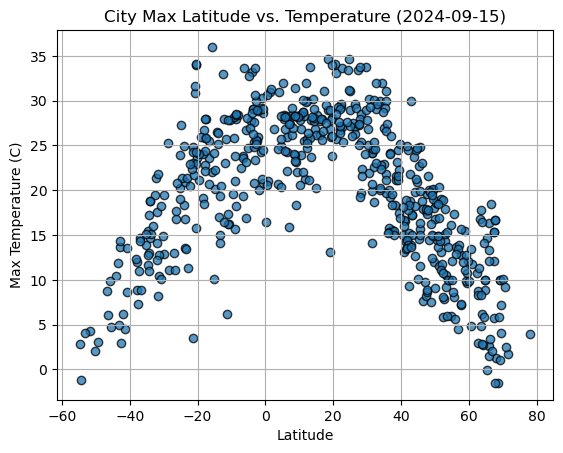

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-09-15)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

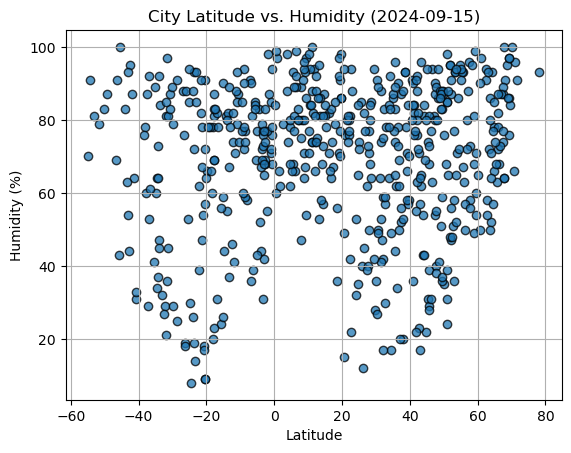

In [51]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-09-15)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

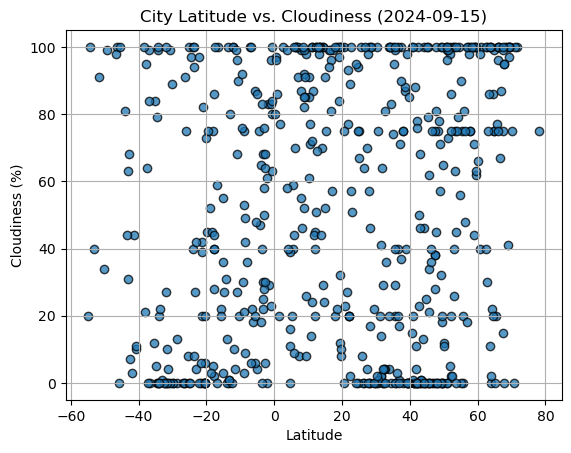

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-09-15)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

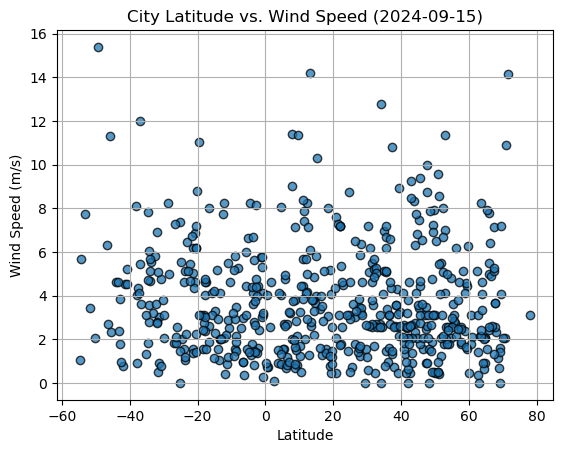

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-09-15)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    plt.scatter(x_values, y_values, linewidths=1, alpha=0.75)
    plt.plot(x_values, regress_values, "r")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(False)
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', 
                 xy=(0.05, 0.05), 
                 xycoords='axes fraction', 
                 fontsize=15, 
                 color="red")
    print(f"The r^2-value is: {r_value**2}")
    plt.show

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,baicheng,45.6167,122.8167,24.87,39,34,9.37,CN,1726462350
2,longyearbyen,78.2186,15.6401,3.91,93,75,3.09,SJ,1726462352
3,ribeira grande,38.5167,-28.7000,21.54,93,87,3.58,PT,1726462353
5,bethel,41.3712,-73.4140,14.21,84,0,2.57,US,1726462356
6,iqaluit,63.7506,-68.5145,4.85,86,100,8.23,CA,1726462357


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.25,79,91,3.44,CL,1726462349
4,blackmans bay,-43.0167,147.3167,13.62,54,63,1.79,AU,1726462354
7,port-aux-francais,-49.3500,70.2167,3.03,87,99,15.39,TF,1726462358
8,port mathurin,-19.6833,63.4167,21.18,66,45,11.05,MU,1726462359
14,bredasdorp,-34.5322,20.0403,11.64,64,79,1.84,ZA,1726462365


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6337105801666023


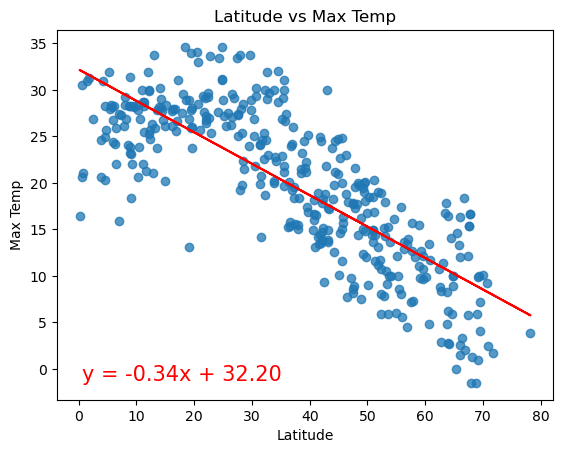

In [55]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temp', 
                       'Latitude vs Max Temp')

This graph models how max temperature is affected by moving closer to the north pole in the Northern Hemisphere (increasing latitude). In the Northern Hemisphere, temperature generally decreases as latitude increases. This makes sense because as you move closer to the poles, temperatures tend to drop.

The r^2-value is: 0.5883409654401756


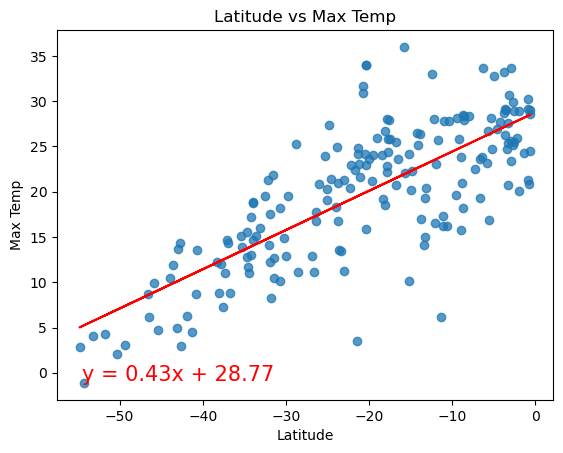

In [56]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temp', 
                       'Latitude vs Max Temp')

This graph models how max temperature is affected by moving closer to the equator in the Southern Hemisphere(increasing latitude). In the Southern Hemisphere, temperature increases as you move from high negative latitudes (closer to the South Pole) towards the equator (0 latitude). This trend is similar to the Northern hemisphere but in the reverse direction due to the difference in hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.001034951278487885


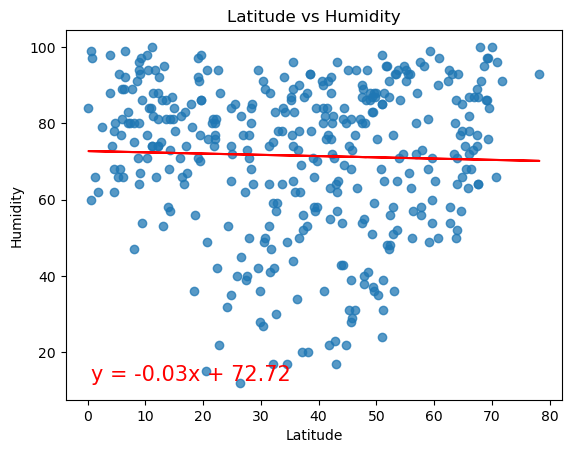

In [57]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity', 
                       'Latitude vs Humidity')

This graph models how humidity changes as you move towards the north pole in the Northern Hemisphere. No strong correlation between latitude and humidity compared to temperature. The relationship could be more variable due to various climatic and geographic factors affecting humidity.

The r^2-value is: 0.005120748887316227


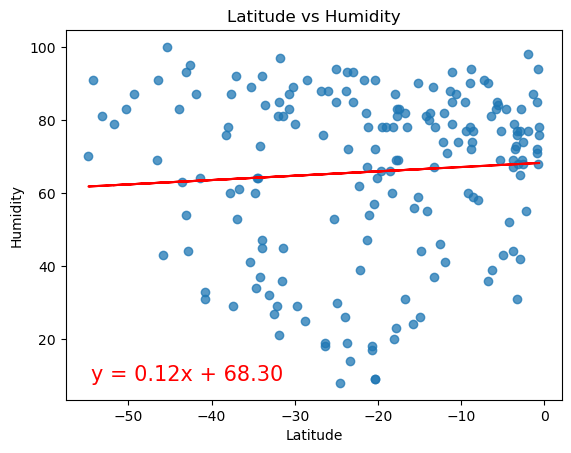

In [58]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity', 
                       'Latitude vs Humidity')

This graph models how humidity changes as you move towards the equator in the Sorthern Hemisphere. Similar to northern hemisphere, no strong correlation between latitude and humidity compared to temperature. The relationship could be more variable due to various climatic and geographic factors affecting humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 4.221178200282872e-05


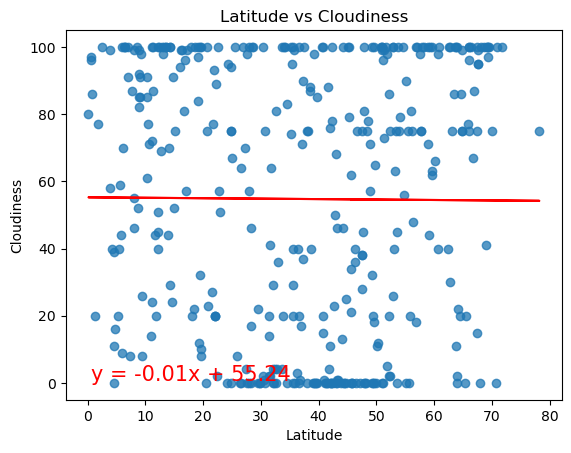

In [60]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness', 
                       'Latitude vs Cloudiness')

This graph shows how cloudiness is affected by moving towards the north pole in the Northern Hemisphere. The relationship between cloudiness and latitude might show little to no clear correlation, as cloud cover can be influenced by a wide range of factors including local weather patterns, ocean currents, and altitude rather than strictly latitude.

The r^2-value is: 0.0012939934395707051


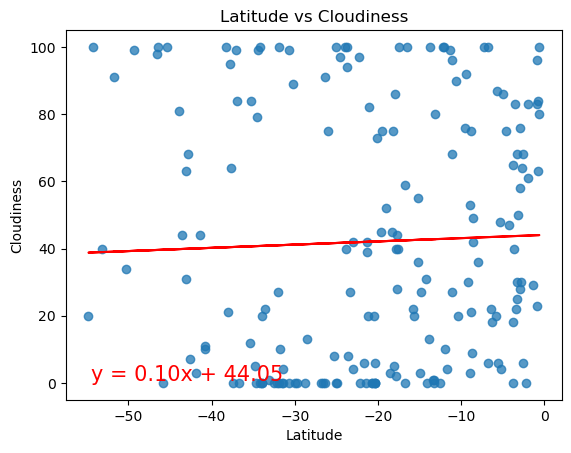

In [61]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness', 
                       'Latitude vs Cloudiness')

This graph shows how cloudiness is affected by moving towards the equator in the Southern Hemisphere. The relationship between cloudiness and latitude might show little to no clear correlation, as cloud cover can be influenced by a wide range of factors including local weather patterns, ocean currents, and altitude rather than strictly latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 5.691714508100766e-07


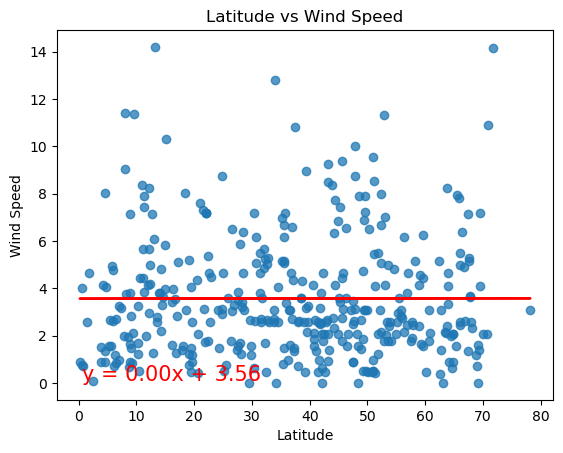

In [62]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed', 
                       'Latitude vs Wind Speed')

This graph shows how wind speed is affected by moving closer to the north pole in the Northern Hemisphere. There is no clear correlation between the two as other climate factors outside of primarily latitude change can affect wind speed, such as proximity to ocean or elevation.

The r^2-value is: 0.03268307539914676


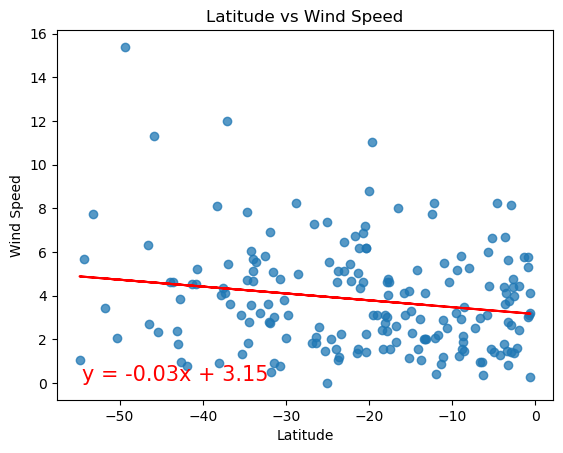

In [63]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed', 
                       'Latitude vs Wind Speed')

This graph shows how wind speed is affected by moving closer to the south pole in the Southern Hemisphere. There is no clear correlation between the two as other climate factors outside of primarily latitude change can affect wind speed, such as proximity to ocean or elevation.